### Problem statement (Term Deposit Sale)--
#### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
#### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
 - a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
 - b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
 - c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots
#### Deliverable – 2 (Prepare the data for analytics) – (10)

 1. Ensure the attribute types are correct. If not, take appropriate actions.
 2. Get the data model ready.
 3. Transform the data i.e. scale / normalize if required
 4. Create the training set and test set in ratio of 70:30

#### Deliverable – 3 (create the ensemble model) – (30)

1- First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2- Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

3- Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)
#### Attribute information
#### Input variables:
##### Bank client data:
- age: Continuous feature
- job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
- marital: marital status (married, single, divorced)
- education: education level (primary, secondary, tertiary)
- default: has credit in default?
- housing: has housing loan?
- loan: has personal loan?
- balance in account
#### Related to previous contact:
* contact: contact communication type
* month: last contact month of year
* day: last contact day of the month
* duration: last contact duration, in seconds*
#### Other attributes:
- campaign: number of contacts performed during this campaign and for this client
- pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
- previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
- poutcome: outcome of the previous marketing campaign
#### Output variable (desired target):
- Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [113]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [189]:
bank_df = pd.read_csv('bank-full.csv', sep=',')

In [190]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [191]:
bank_df.shape

(45211, 17)

In [192]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.

In [193]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [194]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [195]:
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

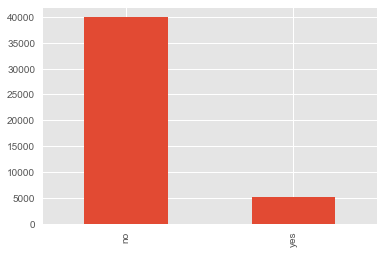

In [196]:
# levels of Y variable
bank_df.Target.value_counts().plot(kind='bar')

In [197]:
bank_df.poutcome.value_counts(normalize=True)

unknown   0.82
failure   0.11
other     0.04
success   0.03
Name: poutcome, dtype: float64

__Poutcome__ has 0.82 unknown values which then we can drop it 

In [198]:
bank_df.education.value_counts(normalize=True)

secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64

In [199]:
bank_df.contact.value_counts(normalize=True)

cellular    0.65
unknown     0.29
telephone   0.06
Name: contact, dtype: float64

In [200]:
bank_df.default.value_counts(normalize=True)


no    0.98
yes   0.02
Name: default, dtype: float64

Almost the entire data for __defaul__ column is no by .98 so we can drop it as it has no value to our data set

In [201]:
bank_df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [202]:
# check for object predictors
obj_df = bank_df.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


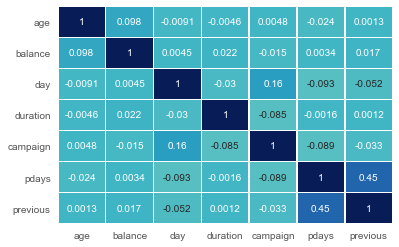

In [203]:
# find the relationship between numeric variables
plt.figure(figsize=(6,4))
sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [204]:
# sns.pairplot(bank_df, hue = 'Target');

There is no linear relationship between predictors 

#### Checking distribution for some individual predictors 

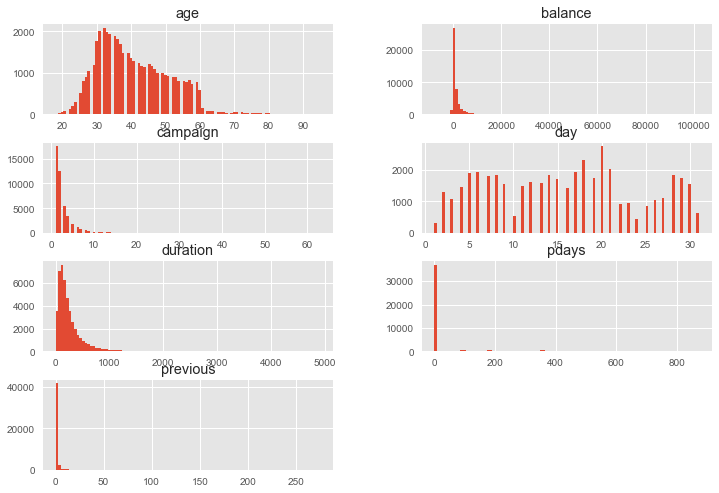

In [205]:
# sns.distplot(bank_df['previous']) for individual columns
columns = list(bank_df)[0:-1] 
bank_df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

From the distribution plot and information given by dataset, __pdays__ and __previouse__  and __balanceare__ highly right skewed so we can treat outliers replacing with median 

In [206]:
print(bank_df['pdays'].quantile(0.50)) 
print(bank_df['pdays'].quantile(0.95)) 
bank_df['pdays'] = np.where(bank_df['pdays'] > 317, -1, bank_df['pdays'])

-1.0
317.0


In [207]:
print(bank_df['balance'].quantile(0.50)) 
print(bank_df['balance'].quantile(0.95)) 
bank_df['balance'] = np.where(bank_df['balance'] > 5768.0, 448.0, bank_df['balance'])


448.0
5768.0


In [208]:
print(bank_df['previous'].quantile(0.50)) 
print(bank_df['previous'].quantile(0.95)) 
bank_df['previous'] = np.where(bank_df['previous'] > 3.0, 0.0, bank_df['previous'])


0.0
3.0


In [209]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,835.63,15.81,258.16,2.76,21.69,0.23
std,10.62,"1,189.47",8.32,257.53,3.10,63.99,0.65
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,126.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"5,768.00",31.00,"4,918.00",63.00,317.00,3.00


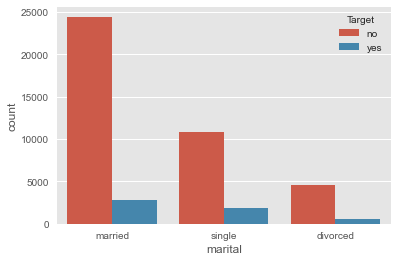

In [210]:
# marital status for Target level
plt.figure(figsize=(6,4))
ax=sns.countplot(x=bank_df['marital'],hue=bank_df['Target']) 
#  df['marital'].value_counts().plot(kind='bar')
plt.show()


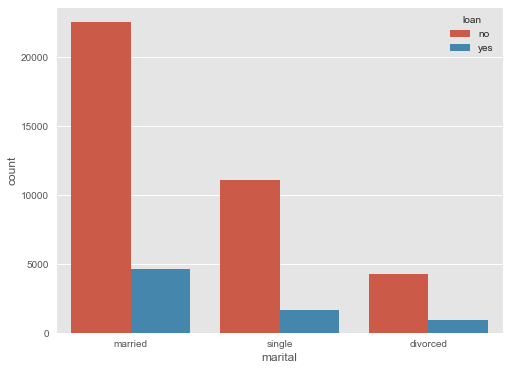

In [211]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x=bank_df['marital'],hue=bank_df['loan'])

<function matplotlib.pyplot.show(*args, **kw)>

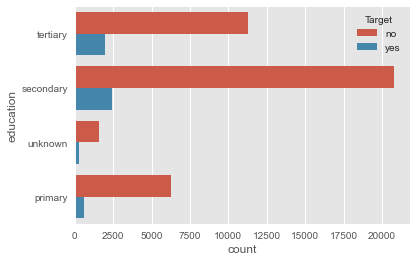

In [212]:
plt.figure(figsize=(6,4))
ay= sns.countplot(y= bank_df['education'], hue=bank_df['Target'])
plt.show



Secondrary education although the client subscribed a term deposit but also declined by far as to other education level  

In [213]:
pd.crosstab(bank_df.loan,bank_df.Target, normalize='index').round(4)*100

Target,no,yes
loan,,
no,87.34,12.66
yes,93.32,6.68


In [214]:
bank_df['quarter'] = [pd.Period(bank_df.month[i], freq='M').quarter for i in range(len(bank_df))]

In [215]:
bank_df.drop(['month','default','poutcome'],axis = 1, inplace=True ) 

In [216]:
bank_df.dtypes

age            int64
job           object
marital       object
education     object
balance      float64
housing       object
loan          object
contact       object
day            int64
duration       int64
campaign       int64
pdays          int64
previous     float64
Target        object
quarter        int64
dtype: object

#### converting string and categorical variables to numeric 

In [217]:
# converting string values of 'yes' and 'no' to numeric zero and one
bank_df['housing'].replace(['no','yes'],[0,1],inplace=True)
bank_df['loan'].replace(['no','yes'],[0,1],inplace=True)
bank_df['Target'].replace(['no','yes'],[0,1],inplace=True)



In [218]:
bank_df = pd.get_dummies(bank_df,drop_first=True)
bank_df.tail()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,Target,quarter,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
45206,51,825.00,0,0,17,977,3,-1,0.00,1,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
45207,71,"1,729.00",0,0,17,456,2,-1,0.00,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
45208,72,"5,715.00",0,0,17,1127,5,184,3.00,1,4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
45209,57,668.00,0,0,17,508,4,-1,0.00,0,4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
45210,37,"2,971.00",0,0,17,361,2,188,0.00,0,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


#### Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [219]:
features = [col for col in bank_df.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(bank_df[features], bank_df['Target'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 28), (13564, 28))

### Create Logistic Regression

In [220]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)


# Fit the model on train
# model_lr = LogisticRegression(solver="liblinear")
# model_lr.fit(X_train, y_train)
#predict on test


C:\Users\layas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=7)

In [221]:
y_predict = lr.predict(X_test)

In [222]:
print("Train: %.2f" % lr.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % lr.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


In [223]:
acc_DT = accuracy_score(y_test, y_predict )
acc_DT

0.8897080507225007

In [224]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89


### Create the decision tree model using “gini” method of finding the split columns and fit it to training data.

In [225]:
#Using 'gini' method of finding the split columns. Other option could be gini index.  

model_gini = DecisionTreeClassifier(criterion='gini',random_state=1)
# dTree = DecisionTreeClassifier(criterion = 'Entropy', random_state=1)
# dTree.fit(X_train, y_train)

In [226]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Print the accuracy of the model & print the confusion matrix

In [227]:
print("Train: %.2f" % model_gini.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_gini.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.87


There is almos high degree of overfitting in the model due to which the test accuracy drops to 0.87 of that of in traing accuracy 0f 1.00 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [228]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [229]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


After Pruning performance in test set improved from 0.87 to 0.89 and overfitting treated 

### Visualizing the tree

In [230]:
y_train.value_counts()

0    27949
1     3698
Name: Target, dtype: int64

In [231]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from six import StringIO


In [232]:
# dot_data = StringIO()
# export_graphviz(clf_pruned, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = features,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('Bank_pruned.png')
# Image(graph.create_png())

In [233]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)
acc_DT

0.8886021822471247

### Decision tree performance

In [234]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11583,390
1,1121,470


C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


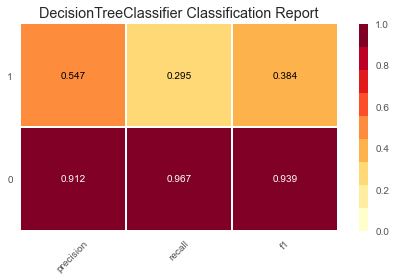

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


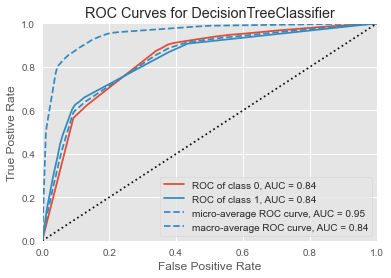

In [235]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "gini", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "gini", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [236]:
bank_df['Target_0'] = clf_pruned.predict_proba(bank_df[features])[:,0]
bank_df['Target_1'] = clf_pruned.predict_proba(bank_df[features])[:,1]

bank_df.head(10)

,age,balance,housing,loan,day,duration,campaign,pdays,previous,Target,quarter,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,Target_0,Target_1
0,58,"2,143.00",1,0,5,261,1,-1,0.00,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.91,0.09
1,44,29.00,1,0,5,151,1,-1,0.00,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0.98,0.02
2,33,2.00,1,1,5,76,1,-1,0.00,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.98,0.02
3,47,"1,506.00",1,0,5,92,1,-1,0.00,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.98,0.02
4,33,1.00,0,0,5,198,1,-1,0.00,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0.98,0.02
5,35,231.00,1,0,5,139,1,-1,0.00,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.98,0.02
6,28,447.00,1,1,5,217,1,-1,0.00,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.98,0.02
7,42,2.00,1,0,5,380,1,-1,0.00,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.91,0.09
8,58,121.00,1,0,5,50,1,-1,0.00,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.98,0.02
9,43,593.00,1,0,5,55,1,-1,0.00,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0.98,0.02


In [237]:
### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [238]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.69
pdays,0.14
housing,0.09
age,0.05
contact_unknown,0.02
day,0.00
job_services,0.00
loan,0.00
job_technician,0.00
contact_telephone,0.00


#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [239]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89


#### Apply the Random forest model and print the accuracy of Random forest Model

In [240]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [241]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [242]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90


C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


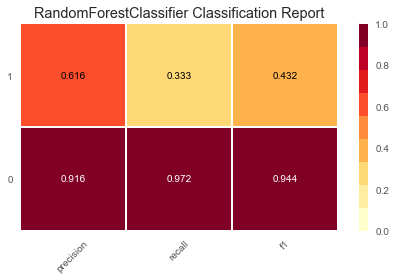

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


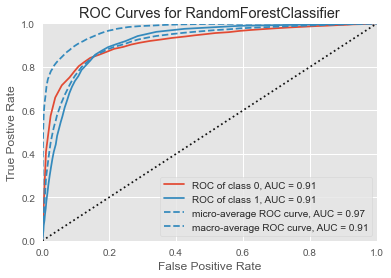

In [243]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Compared to the decision tree, we can see that the accuracy has slightly improved for the Random forest model

### Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [244]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [245]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [246]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90
0,Adaboost,0.89


C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


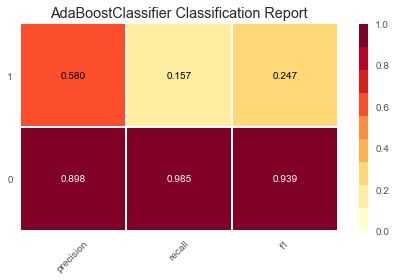

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


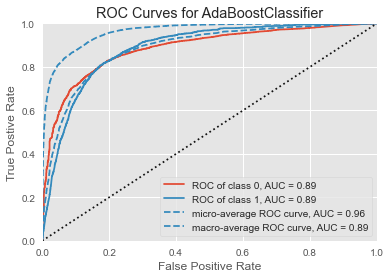

In [247]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply Bagging Classifier Algorithm and print the accuracy.

In [248]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [249]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [250]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90
0,Adaboost,0.89
0,Bagging,0.90


C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


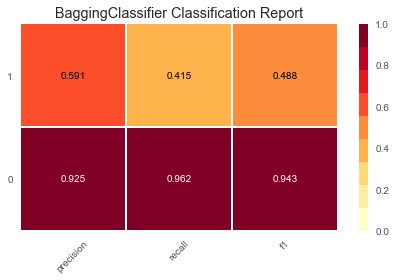

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


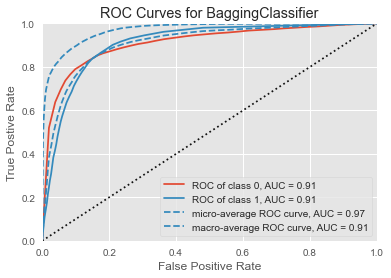

In [251]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [252]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [253]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [254]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90
0,Adaboost,0.89
0,Bagging,0.90
0,Gradient Boost,0.90


For this dataset, __Random forest__ , __bagging__ and __Gradient Boost__ models give the best results on test predictions by 0.90

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


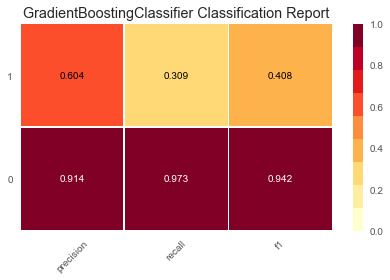

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


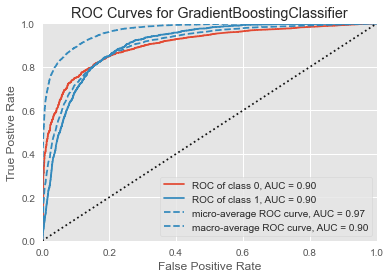

In [255]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [256]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


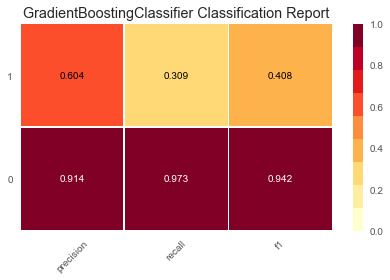

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


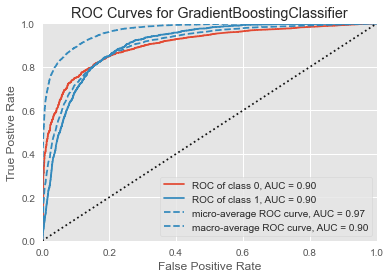

In [257]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


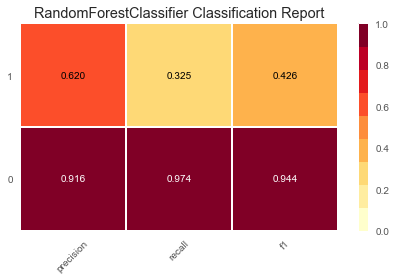

C:\Users\layas\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


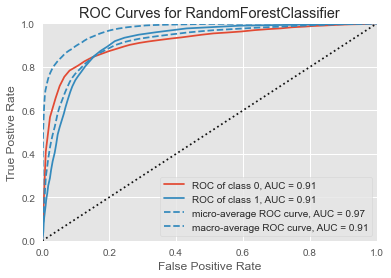

In [258]:
visClassifierResults(RandomForestClassifier(n_estimators = 50))